In [62]:
# Importando biblioteca
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [63]:
# Lendo o dataframe
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [64]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [65]:
renomear_colunas = {
    'Age': 'Idade', 
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo de dor', 
    'RestingBP': 'Pressão',
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'Glicemia', 
    'RestingECG': 'Eletro', 
    'MaxHR': 'BPM',
    'ExerciseAngina': 'Dor por exec.', 
    'ST_Slope': 'Incl. ST', 
    'HeartDisease': 'DCV'
}

df = df.rename(columns=renomear_colunas)
df

,Idade,Sexo,Tipo de dor,Pressão,Colesterol,Glicemia,Eletro,BPM,Dor por exec.,Oldpeak,Incl. ST,DCV
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          918 non-null    int64  
 1   Sexo           918 non-null    object 
 2   Tipo de dor    918 non-null    object 
 3   Pressão        918 non-null    int64  
 4   Colesterol     918 non-null    int64  
 5   Glicemia       918 non-null    int64  
 6   Eletro         918 non-null    object 
 7   BPM            918 non-null    int64  
 8   Dor por exec.  918 non-null    object 
 9   Oldpeak        918 non-null    float64
 10  Incl. ST       918 non-null    object 
 11  DCV            918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Pressão,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
Glicemia,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
BPM,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
DCV,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [68]:
df.isnull().sum()

Idade            0
Sexo             0
Tipo de dor      0
Pressão          0
Colesterol       0
Glicemia         0
Eletro           0
BPM              0
Dor por exec.    0
Oldpeak          0
Incl. ST         0
DCV              0
dtype: int64

In [69]:
df.shape[0]

918

In [70]:
# Excluir as linhas que possuem o valor de colesterol igual a 0
df = df[df['Colesterol'] != 0]

# Excluir as linhas que possuem o valor de pressão arterial igual a 0
df = df[df['Pressão'] != 0]

In [71]:
doencas = df['DCV']
doencas

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: DCV, Length: 746, dtype: int64

## 1 - Importando o banco de Dados

## 2 - Renomear as Colunas

## 3 - Tratamento de Dados 

## 5 - Análise de Dados 

In [78]:
# Análise de Dados
contagem = df['DCV'].value_counts().reset_index()
contagem

,DCV,count
0,0,390
1,1,356


In [80]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,908,909,910,911,912,913,914,915,916,917
Idade,40,49,37,48,54,39,45,54,37,48,...,63,63,41,59,57,45,68,57,57,38
Sexo,M,F,M,F,M,M,F,M,M,F,...,M,F,M,M,F,M,M,M,F,M
Tipo de dor,ATA,NAP,ATA,ASY,NAP,NAP,ATA,ATA,ASY,ATA,...,ASY,ASY,ATA,ASY,ASY,TA,ASY,ASY,ATA,NAP
Pressão,140,160,130,138,150,120,130,110,140,120,...,140,124,120,164,140,110,144,130,130,138
Colesterol,289,180,283,214,195,339,237,208,207,284,...,187,197,157,176,241,264,193,131,236,175
Glicemia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Eletro,Normal,Normal,ST,Normal,Normal,Normal,Normal,Normal,Normal,Normal,...,LVH,Normal,Normal,LVH,Normal,Normal,Normal,Normal,LVH,Normal
BPM,172,156,98,108,122,170,170,142,130,120,...,144,136,182,90,123,132,141,115,174,173
Dor por exec.,N,N,N,Y,N,N,N,N,Y,N,...,Y,Y,N,N,Y,N,N,Y,N,N
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0,0.0,0.0,1.5,0.0,...,4.0,0.0,0.0,1.0,0.2,1.2,3.4,1.2,0.0,0.0


In [86]:
# Função que constroe gráfico em barras
def constroi_grafico_barras(variavel):
    contagem = df[variavel].value_counts().reset_index()
    fig = px.bar(contagem, x=variavel, y='count', title ='Quantidade de ' + variavel, text_auto=True )
    fig.show()

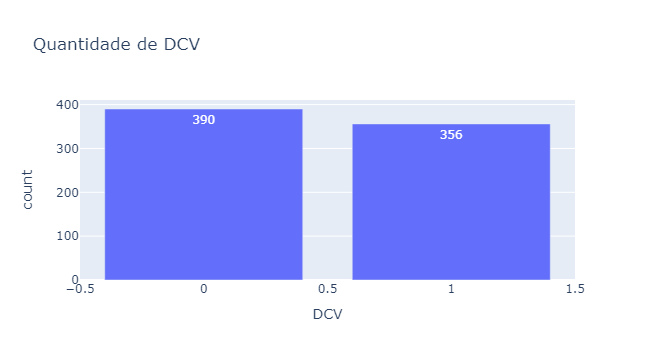

In [88]:
constroi_grafico_barras('DCV')

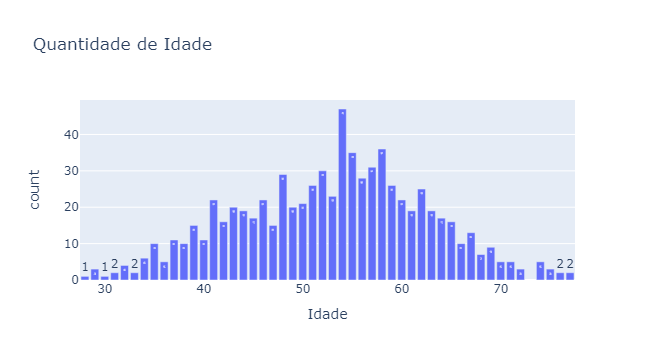

In [89]:
constroi_grafico_barras('Idade')

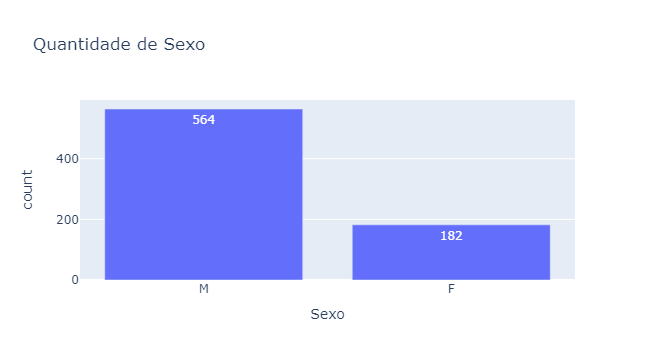

In [90]:
constroi_grafico_barras('Sexo')

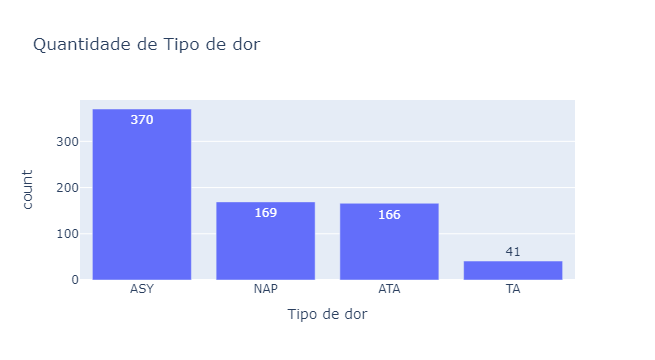

In [91]:
constroi_grafico_barras('Tipo de dor')

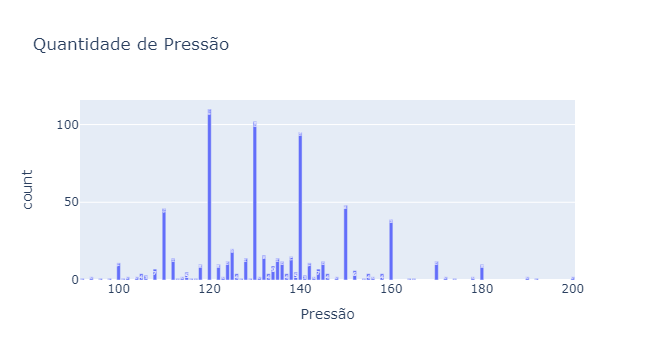

In [92]:
constroi_grafico_barras('Pressão')

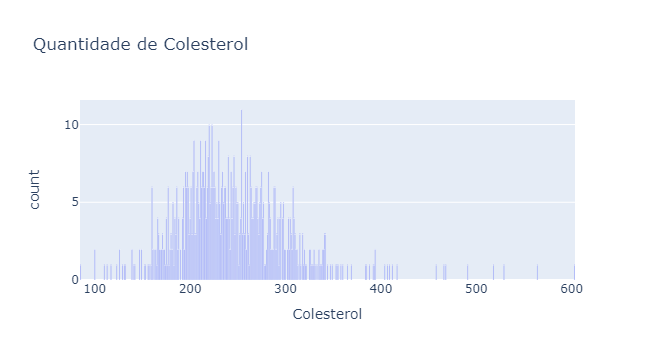

In [94]:
constroi_grafico_barras('Colesterol')

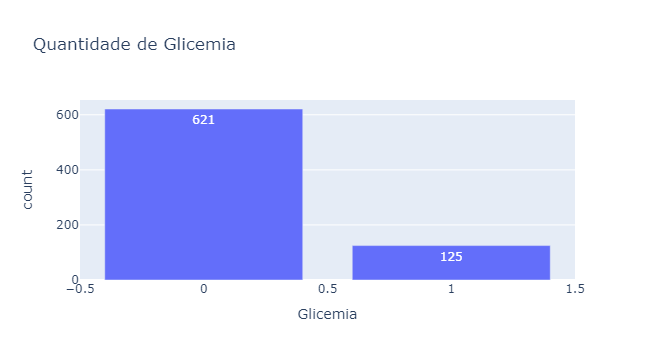

In [95]:
constroi_grafico_barras('Glicemia')

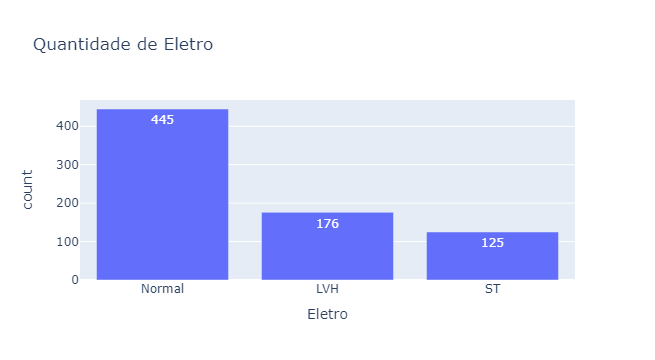

In [96]:
constroi_grafico_barras('Eletro')

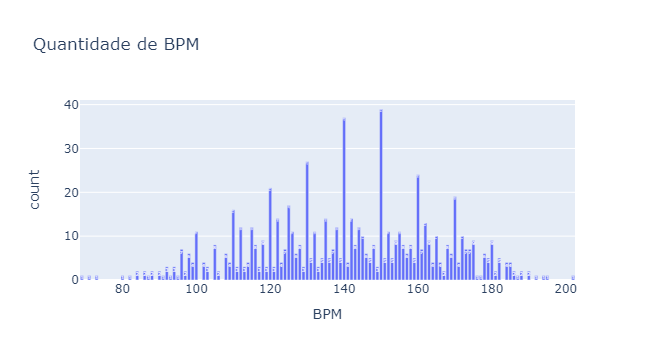

In [97]:
constroi_grafico_barras('BPM')

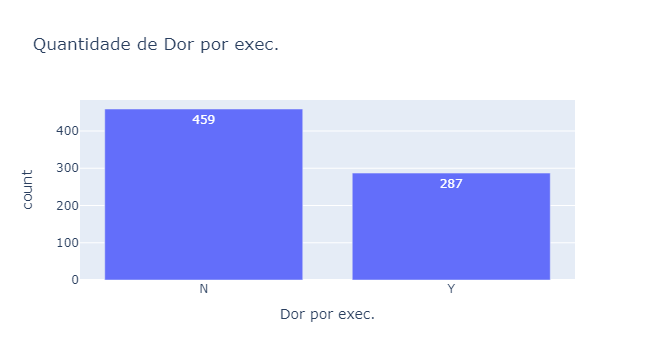

In [98]:
constroi_grafico_barras('Dor por exec.')

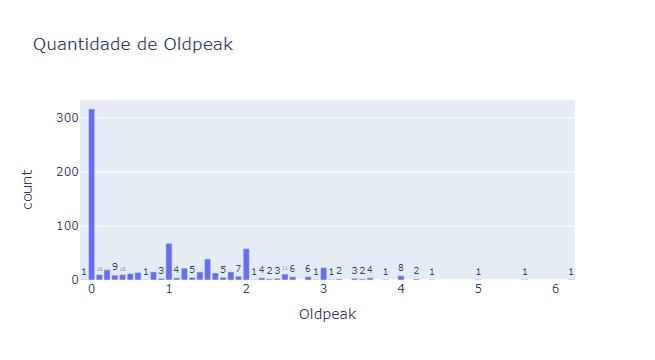

In [99]:
constroi_grafico_barras('Oldpeak')

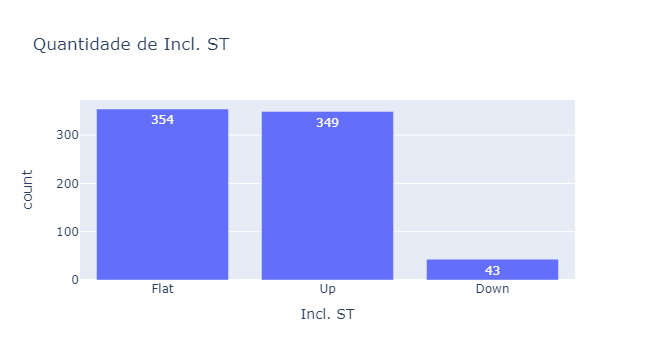

In [102]:
constroi_grafico_barras('Incl. ST')

## 6 - Análise exploratória 